In [24]:
# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the datasets with corrected paths
df_cs1 = pd.read_csv("neuroqwerty-mit-csxpd-dataset-1.0.0/MIT-CS1PD/GT_DataPD_MIT-CS1PD.csv")
df_cs2 = pd.read_csv("neuroqwerty-mit-csxpd-dataset-1.0.0/MIT-CS2PD/GT_DataPD_MIT-CS2PD.csv")

# Combine the datasets
df_all = pd.concat([df_cs1, df_cs2], ignore_index=True)

# Create output directory for the figures
output_dir = "static_visualizations"
os.makedirs(output_dir, exist_ok=True)

# # Plot 1: Histogram of UPDRS scores
# plt.figure(figsize=(8, 5))
# sns.histplot(df_all['updrs108'], bins=20, kde=True)
# plt.title("Distribution of UPDRS Scores")
# plt.xlabel("UPDRS Score")
# plt.ylabel("Count")
# plt.tight_layout()
# plt.savefig(f"{output_dir}/updrs_distribution.png")
# plt.close()

# # Plot 2: Typing Speed vs. UPDRS
# plt.figure(figsize=(8, 5))
# sns.scatterplot(x="updrs108", y="typingSpeed", hue="gt", data=df_all)
# sns.regplot(x="updrs108", y="typingSpeed", data=df_all, scatter=False, color='gray')
# plt.title("Typing Speed vs. UPDRS Score")
# plt.xlabel("UPDRS Score")
# plt.ylabel("Typing Speed (keys/min)")
# plt.legend(title="PD Diagnosis")
# plt.tight_layout()
# plt.savefig(f"{output_dir}/typing_speed_vs_updrs.png")
# plt.close()

# # Plot 3: Boxplot of Typing Speed by PD Diagnosis
# plt.figure(figsize=(8, 5))
# sns.boxplot(x="gt", y="typingSpeed", data=df_all)
# plt.xticks([0, 1], ['No PD', 'PD'])
# plt.title("Typing Speed Distribution by Diagnosis")
# plt.xlabel("Parkinson’s Diagnosis")
# plt.ylabel("Typing Speed (keys/min)")
# plt.tight_layout()
# plt.savefig(f"{output_dir}/typing_speed_by_diagnosis.png")
# plt.close()

# # Plot 4: NQ Score vs. UPDRS
# plt.figure(figsize=(8, 5))
# sns.scatterplot(x="updrs108", y="nqScore", hue="gt", data=df_all)
# sns.regplot(x="updrs108", y="nqScore", data=df_all, scatter=False, color='black')
# plt.title("NQ Score vs. UPDRS Score")
# plt.xlabel("UPDRS Score")
# plt.ylabel("nqScore")
# plt.legend(title="PD Diagnosis")
# plt.tight_layout()
# plt.savefig(f"{output_dir}/nqscore_vs_updrs.png")
# plt.close()

# # Plot 5: afTap vs sTap
# plt.figure(figsize=(8, 5))
# sns.scatterplot(x="afTap", y="sTap", hue="gt", data=df_all)
# plt.title("Alternate Finger Tap vs Single Finger Tap Time")
# plt.xlabel("afTap (ms)")
# plt.ylabel("sTap (ms)")
# plt.legend(title="PD Diagnosis")
# plt.tight_layout()
# plt.savefig(f"{output_dir}/afTap_vs_sTap.png")
# plt.close()

# # Plot 6: Boxplot of nqScore by PD Diagnosis
# plt.figure(figsize=(8, 5))
# sns.boxplot(x="gt", y="nqScore", data=df_all)
# plt.xticks([0, 1], ['No PD', 'PD'])
# plt.title("nqScore Distribution by Diagnosis")
# plt.xlabel("Parkinson’s Diagnosis")
# plt.ylabel("nqScore")
# plt.tight_layout()
# plt.savefig(f"{output_dir}/nqscore_by_diagnosis.png")
# plt.close()


In [25]:
df_all.to_csv("combined_data.csv", index=False)

In [26]:
df_all

,pID,gt,updrs108,afTap,sTap,nqScore,typingSpeed,file_1,file_2
0,11,True,14.25,NaN,162.25,0.117543,189.372549,1402930351.011_001_014.csv,1403706430.011_003_014.csv
1,60,False,2.00,NaN,162.25,0.070350,60.533333,1402932300.060_001_014.csv,1403708258.060_003_014.csv
2,67,True,25.25,NaN,133.75,0.223411,54.333333,1401117235.067_001_014.csv,1401978395.067_003_014.csv
3,68,False,6.00,NaN,159.00,0.074973,71.800000,1401114972.068_001_014.csv,1401980765.068_003_014.csv
4,70,True,26.25,NaN,113.50,0.175751,39.614035,1404311419.070_001_014.csv,1404743687.070_003_014.csv
...,...,...,...,...,...,...,...,...,...
80,1063,False,0.00,110.0,170.00,-0.005529,109.800000,1463511198.1063_001_014.csv,NaN
81,1064,True,28.00,75.5,140.00,0.246866,105.333333,1458723488.1064_001_014.csv,NaN
82,1066,True,12.00,118.0,170.50,0.033189,140.250000,1460104760.1066_001_014.csv,NaN
83,1068,True,26.00,65.5,98.00,0.125523,48.800000,1460559248.1068_001_014.csv,NaN


In [21]:
df_all['updrs108'].describe()

count    85.000000
mean     11.158824
std      10.891978
min       0.000000
25%       1.500000
50%       6.000000
75%      19.000000
max      39.500000
Name: updrs108, dtype: float64

In [40]:
import pandas as pd
import os
import glob
import os

def process_keystroke_file(filepath):
    try:
        df = pd.read_csv(filepath, header=None, names=['key', 'hold_duration', 'release_time', 'press_time'])
        avg_hold = df['hold_duration'].mean()
        avg_release = df['release_time'].mean()
        avg_press = df['press_time'].mean()
        return avg_hold, avg_release, avg_press
    except:
        return None, None, None

# Path to your two folders
folder_paths = ['neuroqwerty-mit-csxpd-dataset-1.0.0/MIT-CS1PD', 'neuroqwerty-mit-csxpd-dataset-1.0.0/MIT-CS2PD']

# Create a dictionary to store averages by file name (without extension)
keystroke_averages = {}

for folder in folder_paths:
    print(f"Processing folder: {folder}")
    for root, dirs, files in os.walk(folder):
        for file in files:
            if file.endswith('.csv'):
                file_path = os.path.join(root, file)
                file_name = file.replace('.csv', '')  # Strip '.csv'
                print(f"Processing file: {file_name}")

                avg_hold, avg_release, avg_press = process_keystroke_file(file_path)
                keystroke_averages[file_name] = {
                    'avg_hold': avg_hold,
                    'avg_release': avg_release,
                    'avg_press': avg_press
                }

# Convert dictionary to DataFrame for merging
keystroke_df = pd.DataFrame.from_dict(keystroke_averages, orient='index').reset_index()
keystroke_df.rename(columns={'index': 'file'}, inplace=True)

# Standardize file_1 and file_2 in df_all to match dictionary keys
df_all['file_1'] = df_all['file_1'].str.replace('.csv', '', regex=False)
df_all['file_2'] = df_all['file_2'].str.replace('.csv', '', regex=False)

# Merge with df_all for both file_1 and file_2
df_all = df_all.merge(keystroke_df, left_on='file_1', right_on='file', how='left')
df_all = df_all.merge(keystroke_df, left_on='file_2', right_on='file', how='left', suffixes=('_file1', '_file2'))

# Drop the redundant 'file' columns after merging
df_all.drop(columns=['file_file1', 'file_file2'], inplace=True)


Processing folder: neuroqwerty-mit-csxpd-dataset-1.0.0/MIT-CS1PD
Processing file: GT_DataPD_MIT-CS1PD
Processing file: 1401114972.068_001_014
Processing file: 1404747197.074_003_014
Processing file: 1402930351.011_001_014
Processing file: 1419870664.073_003_014
Processing file: 1409235978.088_003_014
Processing file: 1409754834.076_003_014
Processing file: 1408976968.086_001_014
Processing file: 1404819923.080_001_014
Processing file: 1410274781.086_003_014
Processing file: 1404834530.077_003_014
Processing file: 1404743687.070_003_014
Processing file: 1403708258.060_003_014
Processing file: 1411657572.095_003_014
Processing file: 1408982860.084_003_014
Processing file: 1404311419.070_001_014
Processing file: 1408980899.085_003_014
Processing file: 1410272175.092_001_014
Processing file: 1419868806.099_003_014
Processing file: 1410450204.078_001_014
Processing file: 1409756763.075_003_014
Processing file: 1403706430.011_003_014
Processing file: 1409238087.089_003_014
Processing file: 1

In [41]:
df_all

,pID,gt,updrs108,afTap,sTap,nqScore,typingSpeed,file_1,file_2,avg_hold_file1,avg_release_file1,avg_press_file1,avg_hold_file2,avg_release_file2,avg_press_file2
0,11,True,14.25,NaN,162.25,0.117543,189.372549,1402930351.011_001_014,1403706430.011_003_014,1.054001e+07,362.023100,-1.053965e+07,3.871532e+06,369.539912,-3.871163e+06
1,60,False,2.00,NaN,162.25,0.070350,60.533333,1402932300.060_001_014,1403708258.060_003_014,1.227950e+07,436.913776,-1.227906e+07,1.477589e+06,438.772723,-1.477150e+06
2,67,True,25.25,NaN,133.75,0.223411,54.333333,1401117235.067_001_014,1401978395.067_003_014,1.926761e-01,438.749888,4.385572e+02,2.090722e-01,441.639310,4.414302e+02
3,68,False,6.00,NaN,159.00,0.074973,71.800000,1401114972.068_001_014,1401980765.068_003_014,1.362952e+06,453.254607,-1.362499e+06,7.195799e+06,450.353471,-7.195349e+06
4,70,True,26.25,NaN,113.50,0.175751,39.614035,1404311419.070_001_014,1404743687.070_003_014,1.820173e-01,412.295675,4.121137e+02,2.171166e+06,459.648563,-2.170706e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,1063,False,0.00,110.0,170.00,-0.005529,109.800000,1463511198.1063_001_014,NaN,1.198398e-01,418.777981,4.186581e+02,NaN,NaN,NaN
81,1064,True,28.00,75.5,140.00,0.246866,105.333333,1458723488.1064_001_014,NaN,1.800125e-01,362.022024,3.618420e+02,NaN,NaN,NaN
82,1066,True,12.00,118.0,170.50,0.033189,140.250000,1460104760.1066_001_014,NaN,1.119467e+07,356.320782,-1.119432e+07,NaN,NaN,NaN
83,1068,True,26.00,65.5,98.00,0.125523,48.800000,1460559248.1068_001_014,NaN,1.855858e+06,444.717691,-1.855413e+06,NaN,NaN,NaN


In [ ]:


# Average hold time
df_all['avg_hold'] = df_all[['avg_hold_file1', 'avg_hold_file2']].mean(axis=1, skipna=True)

# Average release time
df_all['avg_release'] = df_all[['avg_release_file1', 'avg_release_file2']].mean(axis=1, skipna=True)

# Average press time
df_all['avg_press'] = df_all[['avg_press_file1', 'avg_press_file2']].mean(axis=1, skipna=True)

df_all = df_all.drop(columns=[
    'avg_hold_file1', 'avg_hold_file2',
    'avg_release_file1', 'avg_release_file2',
    'avg_press_file1', 'avg_press_file2'
])


KeyError: "None of [Index(['avg_hold_file1', 'avg_hold_file2'], dtype='object')] are in the [columns]"

In [48]:

df_all.drop(columns=['file_1', 'file_2'], inplace=True)

In [50]:
df_all.to_csv("combined_data_with_keystroke_averages.csv", index=False)

In [51]:
df_all

,pID,gt,updrs108,afTap,sTap,nqScore,typingSpeed,avg_hold,avg_release,avg_press
0,11,True,14.25,NaN,162.25,0.117543,189.372549,7.205771e+06,365.781506,-7.205405e+06
1,60,False,2.00,NaN,162.25,0.070350,60.533333,6.878544e+06,437.843249,-6.878106e+06
2,67,True,25.25,NaN,133.75,0.223411,54.333333,2.008742e-01,440.194599,4.399937e+02
3,68,False,6.00,NaN,159.00,0.074973,71.800000,4.279376e+06,451.804039,-4.278924e+06
4,70,True,26.25,NaN,113.50,0.175751,39.614035,1.085583e+06,435.972119,-1.085147e+06
...,...,...,...,...,...,...,...,...,...,...
80,1063,False,0.00,110.0,170.00,-0.005529,109.800000,1.198398e-01,418.777981,4.186581e+02
81,1064,True,28.00,75.5,140.00,0.246866,105.333333,1.800125e-01,362.022024,3.618420e+02
82,1066,True,12.00,118.0,170.50,0.033189,140.250000,1.119467e+07,356.320782,-1.119432e+07
83,1068,True,26.00,65.5,98.00,0.125523,48.800000,1.855858e+06,444.717691,-1.855413e+06


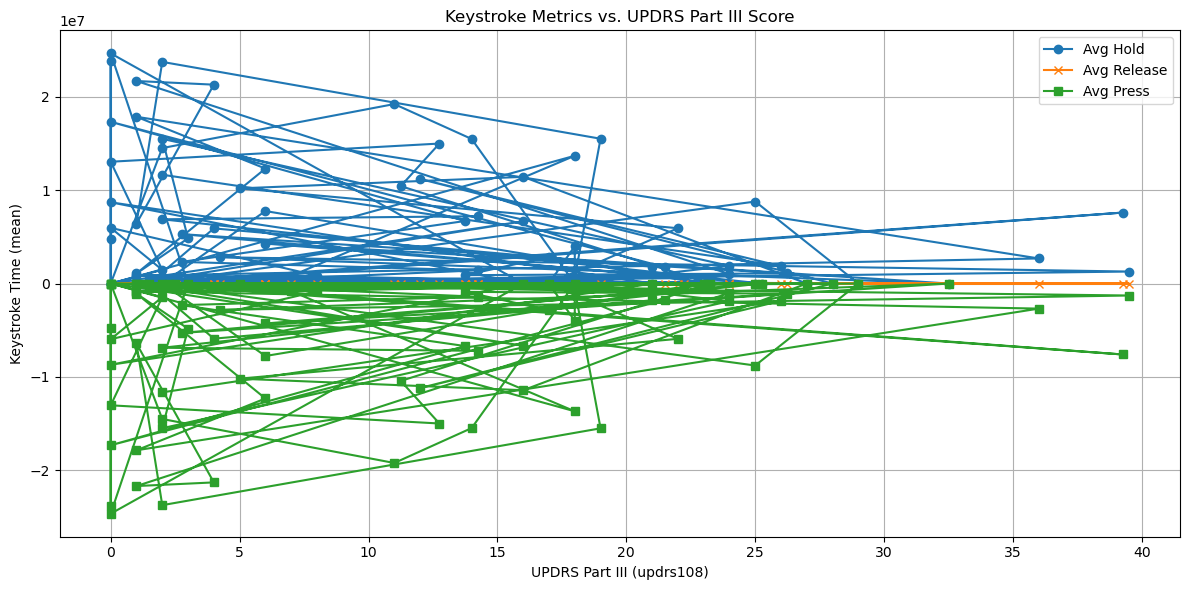

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(df_all['updrs108'], df_all['avg_hold'], marker='o', label='Avg Hold')
plt.plot(df_all['updrs108'], df_all['avg_release'], marker='x', label='Avg Release')
plt.plot(df_all['updrs108'], df_all['avg_press'], marker='s', label='Avg Press')

plt.xlabel('UPDRS Part III (updrs108)')
plt.ylabel('Keystroke Time (mean)')
plt.title('Keystroke Metrics vs. UPDRS Part III Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

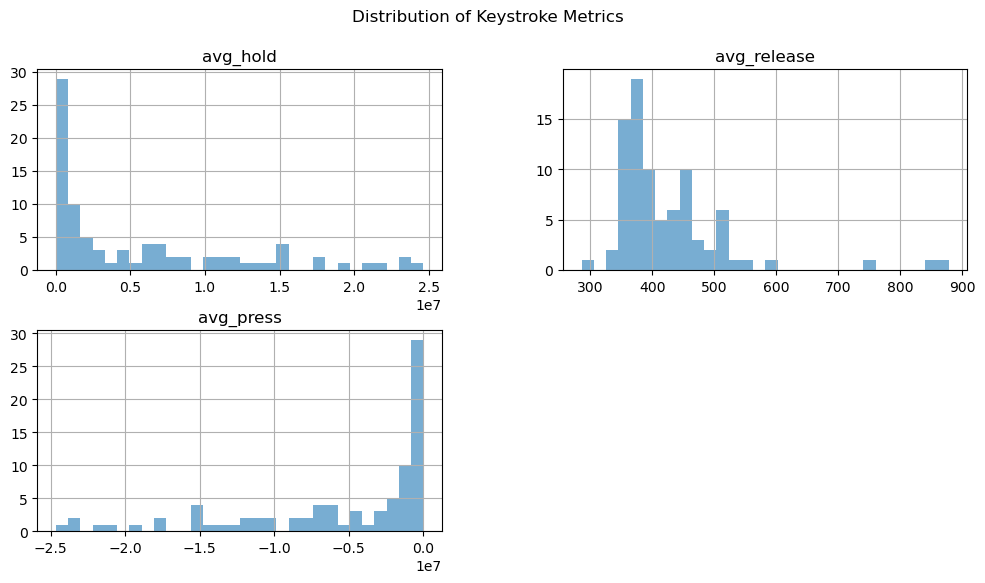

In [53]:
df_all[['avg_hold', 'avg_release', 'avg_press']].hist(bins=30, figsize=(12, 6), alpha=0.6)
plt.suptitle('Distribution of Keystroke Metrics')
plt.show()